In [1]:
# data processing
import pandas as pd

#linear algebra
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn.metrics import classification_report 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# #online_coupon train data
# df_on=pd.read_csv("ccf_online_stage1_train.csv")

# #offline_coupon train data
# df_off=pd.read_csv("ccf_offline_stage1_train.csv")

# x = 'Null'
# df_off_unique = (df_off.fillna(x).groupby(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
#        'Date_received', 'Date']).size().reset_index().rename(columns={0 : 'Count'}).replace(x,np.NaN))
# df_off_unique

# #offline_coupon test data
# df_off_test=pd.read_csv("ccf_offline_stage1_test_revised.csv")

# df_off_unique.drop(['Count'],axis=1,inplace=True)
# df_off_unique.drop(df_off_unique[df_off_unique['Date_received'].isna()].index, inplace = True) 

# df_off_unique['Date'] = pd.to_datetime(df_off_unique['Date'],format="%Y%m%d")
# df_off_unique['Date_received'] = pd.to_datetime(df_off_unique['Date_received'],format="%Y%m%d")

# df_off_unique["Redeem_date"]=df_off_unique["Date"].dt.date-df_off_unique["Date_received"].dt.date
# df_off_unique["Redeem_date"]=df_off_unique["Date"].dt.date-df_off_unique["Date_received"].dt.date
# df_off_unique['Redeem_date'] = df_off_unique['Redeem_date'].dt.days.astype('str')
# df_off_unique['Redeem_date'] = pd.to_numeric(df_off_unique['Redeem_date'],errors="coerce")



# split_data = df_off_unique["Discount_rate"].str.split(":")
# data = split_data.to_list()


# for i in range(len(data)):
#     if len(data[i])==1:
#         data[i].insert(1,100-float(data[i][0])*100)
#         data[i][0]=100
        

# df_off_unique['temp']=data
# df_off_unique[['Original_Price','Discounted_price']] = pd.DataFrame(df_off_unique.temp.values.tolist(), index= df_off_unique.index)
# df_off_unique["Original_Price"]=df_off_unique["Original_Price"].astype(float)
# df_off_unique["Discounted_price"]=df_off_unique["Discounted_price"].astype(float)
# df_off_unique["Rate"]=round((df_off_unique["Original_Price"]-df_off_unique["Discounted_price"])/df_off_unique["Original_Price"],3)
# del df_off_unique["temp"] 

# df_off_unique["Redeem_date"].fillna(-1, inplace = True) 
# df_off_unique["Distance"].fillna(df_off_unique["Distance"].mean(), inplace = True) 

# df_off_unique["Target"]=0
# df_off_unique.loc[(df_off_unique["Redeem_date"]<=15) & (df_off_unique["Redeem_date"]>=0), 'Target'] = 1 
# df_off_unique

In [87]:
# reading training data from feature engineering
df_train=pd.read_csv("Train_data.csv")
#df_train["DateOrder"]=df_train["Date"]
#df_train["DateOrder"].fillna(df_train["Date_received"],inplace=True)
#df_train.sort_values(by='DateOrder',inplace=True)
df_train

,Unnamed: 0,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Redeem_date,Original_Price,Discounted_price,Rate,Target,Coupon_receive_count,Coupon_redeem_count,User_Redeem_Receive_Ratio,User_avg_distance,ActiveDuration,No_of_buys
0,0,4,1433,8735.0,30:5,10.0,2016-02-14,NaN,-1.0,30.0,5.0,0.833,0,2,0,0.0,10.000000,2,0
1,1,4,1469,2902.0,0.95,10.0,2016-06-07,NaN,-1.0,100.0,5.0,0.950,0,2,0,0.0,10.000000,2,0
2,2,35,3381,1807.0,300:30,0.0,2016-01-30,NaN,-1.0,300.0,30.0,0.900,0,4,0,0.0,0.000000,2,0
3,3,35,3381,9776.0,10:5,0.0,2016-01-29,NaN,-1.0,10.0,5.0,0.500,0,4,0,0.0,0.000000,2,0
4,4,35,3381,11951.0,200:20,0.0,2016-01-29,NaN,-1.0,200.0,20.0,0.900,0,4,0,0.0,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015384,1015384,7360967,3103,2375.0,30:1,2.0,2016-01-20,NaN,-1.0,30.0,1.0,0.967,0,3,0,0.0,1.666667,3,0
1015385,1015385,7360967,6485,10323.0,20:5,1.0,2016-03-22,NaN,-1.0,20.0,5.0,0.750,0,3,0,0.0,1.666667,3,0
1015386,1015386,7361024,1433,8735.0,30:5,10.0,2016-02-11,NaN,-1.0,30.0,5.0,0.833,0,1,0,0.0,10.000000,1,0
1015387,1015387,7361032,2146,11173.0,100:10,2.0,2016-01-29,NaN,-1.0,100.0,10.0,0.900,0,2,0,0.0,5.000000,1,0


In [88]:
df_train.columns

Index(['Unnamed: 0', 'User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate',
       'Distance', 'Date_received', 'Date', 'Redeem_date', 'Original_Price',
       'Discounted_price', 'Rate', 'Target', 'Coupon_receive_count',
       'Coupon_redeem_count', 'User_Redeem_Receive_Ratio', 'User_avg_distance',
       'ActiveDuration', 'No_of_buys'],
      dtype='object')

In [107]:
 feature_names=['Distance', 'Original_Price',
        'Discounted_price', 'Rate', 'Coupon_receive_count',
        'Coupon_redeem_count', 'User_Redeem_Receive_Ratio', 'User_avg_distance','ActiveDuration','No_of_buys']

X = df_train[feature_names]

Y = df_train['Target']

In [108]:
X

,Distance,Original_Price,Discounted_price,Rate,Coupon_receive_count,Coupon_redeem_count,User_Redeem_Receive_Ratio,User_avg_distance,ActiveDuration,No_of_buys
0,10.0,30.0,5.0,0.833,2,0,0.0,10.000000,2,0
1,10.0,100.0,5.0,0.950,2,0,0.0,10.000000,2,0
2,0.0,300.0,30.0,0.900,4,0,0.0,0.000000,2,0
3,0.0,10.0,5.0,0.500,4,0,0.0,0.000000,2,0
4,0.0,200.0,20.0,0.900,4,0,0.0,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...
1015384,2.0,30.0,1.0,0.967,3,0,0.0,1.666667,3,0
1015385,1.0,20.0,5.0,0.750,3,0,0.0,1.666667,3,0
1015386,10.0,30.0,5.0,0.833,1,0,0.0,10.000000,1,0
1015387,2.0,100.0,10.0,0.900,2,0,0.0,5.000000,1,0


## Train test split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=False)

# Model

## Logistic Regression 

Confusion Matrix :

[[188661   2084]
 [  6171   6162]]

______________________________________________________


Accuracy Score : 0.9593505943529087

______________________________________________________


Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    190745
           1       0.75      0.50      0.60     12333

    accuracy                           0.96    203078
   macro avg       0.86      0.74      0.79    203078
weighted avg       0.95      0.96      0.96    203078


______________________________________________________

ROC AUC Score of Probailities:  0.974
ROC AUC Curve


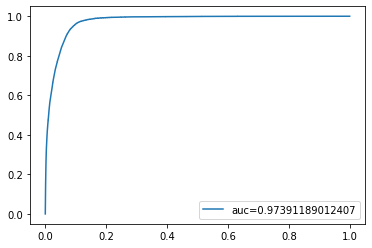

In [111]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.5 else 0 for x in y_pred]

results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## SGD Classifier

Confusion Matrix :

[[188595   2150]
 [  6137   6196]]

______________________________________________________


Accuracy Score : 0.9591930194309576

______________________________________________________


Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    190745
           1       0.74      0.50      0.60     12333

    accuracy                           0.96    203078
   macro avg       0.86      0.75      0.79    203078
weighted avg       0.95      0.96      0.96    203078


______________________________________________________

ROC AUC Score of Probailities:  0.959
ROC AUC Curve


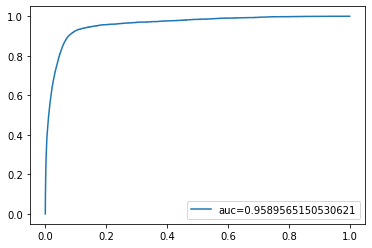

In [93]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="log", penalty="l2")
model.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.50 else 0 for x in y_pred]

results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree

Confusion Matrix :

[[187073   3505]
 [  5699   6801]]

______________________________________________________


Accuracy Score : 0.9546775130737943

______________________________________________________


Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    190578
           1       0.66      0.54      0.60     12500

    accuracy                           0.95    203078
   macro avg       0.82      0.76      0.79    203078
weighted avg       0.95      0.95      0.95    203078


______________________________________________________

ROC AUC Score of Probailities:  0.902
ROC AUC Curve


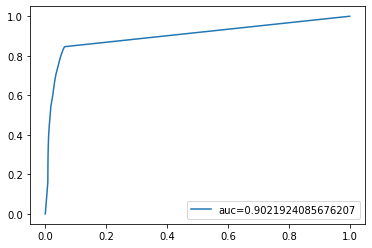

In [94]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.50 else 0 for x in y_pred]

results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest Classifier

Confusion Matrix :

[[187073   3505]
 [  5699   6801]]

______________________________________________________


Accuracy Score : 0.9546775130737943

______________________________________________________


Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    190578
           1       0.66      0.54      0.60     12500

    accuracy                           0.95    203078
   macro avg       0.82      0.76      0.79    203078
weighted avg       0.95      0.95      0.95    203078


______________________________________________________

ROC AUC Score of Probailities:  0.902
ROC AUC Curve


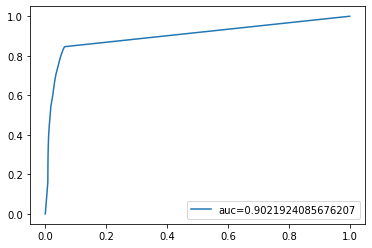

In [95]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.50 else 0 for x in y_pred]

results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Light GBM

In [96]:
# import lightgbm as lgb
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# d_train = lgb.Dataset(X_train, label=y_train)
# params = {}
# params['learning_rate'] = 0.003
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'binary'
# params['metric'] = 'binary_logloss'
# params['sub_feature'] = 0.5
# params['num_leaves'] = 10
# params['min_data'] = 50
# params['max_depth'] = 10
# clf = lgb.train(params, d_train, 100)

# #Prediction
# y_pred=clf.predict(X_test)
# #df_off_unique.loc[(df_off_unique["Redeem_date"]<=15) & (df_off_unique["Redeem_date"]>=0), 'Target'] = 1 
# y_pred = (y_pred >= 0.5).astype(int)

# #convert into binary values
# #for i in range(len(y_pred)):
# #    if y_pred[i]>=.5:       # setting threshold to .5
# #        y_pred[i]=1
# #    else:  
# #        y_pred[i]=0

# cm = confusion_matrix(y_test, y_pred)

# print ('Confusion Matrix :')
# print (cm) 
# print ('Accuracy Score :',accuracy_score(y_test, y_pred))
# print ('Report : ')
# print (classification_report(y_test, y_pred))

## XGBoost

In [103]:
from xgboost import XGBClassifier
from xgboost import plot_importance
#X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=False)

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = logreg.predict_proba(X_test)[:,1].tolist()
y_values = [1 if x>0.5 else 0 for x in y_pred]


results = confusion_matrix(y_test, y_values) 
print ('Confusion Matrix :\n')
print(results) 

print ('\n______________________________________________________\n')

print ('\nAccuracy Score :',accuracy_score(y_test, y_values))

print ('\n______________________________________________________\n')

print ('\nReport : ')
print (classification_report(y_test, y_values))

print ('\n______________________________________________________\n')

#roc curve
roc_score = round(roc_auc_score(y_test, y_pred), 3)
print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

print ('\n______________________________________________________\n')


print("\nFeature importance\n")
plot_importance(model)
plt.show()

ValueError: X has 7 features per sample; expecting 10

## SVM

In [98]:
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(X_train, y_train)
# y_pred = svm.predict_proba(X_test)[:,1].tolist()
# y_values = [1 if x>0.50 else 0 for x in y_pred]

# results = confusion_matrix(y_test, y_values) 
# print ('Confusion Matrix :')
# print(results) 
# print ('Accuracy Score :',accuracy_score(y_test, y_values))
# print ('Report : ')
# print (classification_report(y_test, y_values))


# #roc curve
# roc_score = round(roc_auc_score(y_test, y_pred), 3)
# print('\n\nROC AUC Score of Probailities:  '+ str(roc_score))
# print('ROC AUC Curve')
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = metrics.roc_auc_score(y_test, y_pred)
# plt.plot(fpr,tpr,label="auc="+str(auc))
# plt.legend(loc=4)
# plt.show()